# 图像分割

## 1、固定阈值

In [7]:
import cv2 as cv
import matplotlib.pyplot as plt
# 灰度图读入
img = cv.imread('images/thresh.png', 0)
print(img)
threshold = 127
# 阈值分割
ret, th = cv.threshold(img, threshold, 255, cv.THRESH_BINARY)
print(ret)
print(th)

cv.imshow('thresh', th)
cv.waitKey(0)
cv.destroyAllWindows()

[[  1   3   3 ...  49  49  64]
 [  2   2   2 ... 252 253 250]
 [  5   2   2 ... 253 251 249]
 ...
 [  1   0   0 ... 255 254 255]
 [  2   1   1 ... 141 141 147]
 [  1   1   1 ...   3   4  11]]
127.0
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0   0   0]]


## 2、固定阈值不同方法的比较

[[  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255   0 ...   0 255 255]]


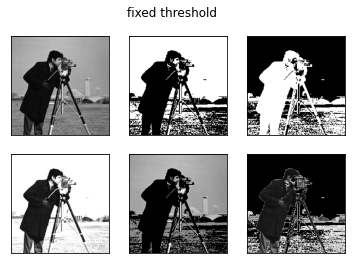

In [12]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/person.png', 0)
#print(img)

#5种阈值法图像分割
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV)
print(thresh1)

images = [img, thresh1, thresh2, thresh3, thresh4,thresh5]
#使用for循环进行遍历，matplotlib进行显示
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.suptitle('fixed threshold')
plt.show()

## 3、自适应阈值与固定阈值的对比

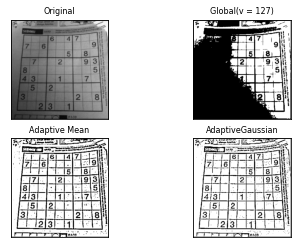

In [13]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/paper2.png', 0)
# 固定阈值
ret, th1 = cv.threshold(img, 127, 255,cv.THRESH_BINARY)
# 自适应阈值
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 4)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 4)
#全局阈值，均值自适应，高斯加权自适应对比
titles = ['Original', 'Global(v = 127)', 'Adaptive Mean', 'AdaptiveGaussian']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize = 8)
    plt.xticks([]), plt.yticks([])

plt.show()